# Chapter 1 - The structure of a Dash app

* Setting up your environment 
* Exploring Dash and other supporting packages 
* Understanding the general structure of a Dash app 
* Creating and running the simplest app 
* Adding HTML and other components to the app 
* Learning how to structure the layout and managing themes 

In [9]:
import plotly.graph_objects as go
app_code = [
    'import dash<br>import dash_html_components as html<br>import dash_core_components as dcc<br>',
    'app = dash.Dash(__name__)<br>',
    'app.layout = html.Div([<br>    dcc.Dropdown()<br>    dcc.Graph()<br>    ...<br>])',
    '@app.callback()<br>    ...<br>@app.callback()<br>    ...',
    "if __name__ == '__main__':<br>    app.run_server()"]

app_parts = [
    'imports (boilerplate)', 
    'app instantiation',
    'app layout: a list of HTML and/or interactive components',
    'callback functions',
    'running the app']

fig = go.Figure()
fig.add_table(header={'values': ['App parts', 'app.py'], },
              cells={'values': [app_parts, app_code], 
                     'align':['center','left'],
                     'font': {'family': ['Arial', 'Courier']}},
              columnwidth=[250, 500])
fig.layout.height= 550
fig.layout.title = 'The Structure of a Dash App'
fig

## What Dash is made of:

In [13]:
import plotly.graph_objects as go
source='https://raw.githubusercontent.com/cldougl/plot_images/add_r_img/vox.png'
sources = [
    'https://flask.palletsprojects.com/en/stable/_static/flask-vertical.png',
    'https://images.prismic.io/plotly-marketing-website/bd1f702a-b623-48ab-a459-3ee92a7499b4_logo-plotly.svg?auto=compress,format',
    'data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHZpZXdCb3g9Ii0xMS41IC0xMC4yMzE3NCAyMyAyMC40NjM0OCI+CiAgPHRpdGxlPlJlYWN0IExvZ288L3RpdGxlPgogIDxjaXJjbGUgY3g9IjAiIGN5PSIwIiByPSIyLjA1IiBmaWxsPSIjNjFkYWZiIi8+CiAgPGcgc3Ryb2tlPSIjNjFkYWZiIiBzdHJva2Utd2lkdGg9IjEiIGZpbGw9Im5vbmUiPgogICAgPGVsbGlwc2Ugcng9IjExIiByeT0iNC4yIi8+CiAgICA8ZWxsaXBzZSByeD0iMTEiIHJ5PSI0LjIiIHRyYW5zZm9ybT0icm90YXRlKDYwKSIvPgogICAgPGVsbGlwc2Ugcng9IjExIiByeT0iNC4yIiB0cmFuc2Zvcm09InJvdGF0ZSgxMjApIi8+CiAgPC9nPgo8L3N2Zz4K',
    'https://global.discourse-cdn.com/flex020/uploads/plot/original/3X/f/3/f3da33405ee7e693abfd12bd4ae334a55e8345d0.png'

]

fig = go.Figure()

fig.add_scatter(x=[1, 2, 3, 4, 5, 6, 7],
                y=[1, 2, 1, 2, 1, 2, 1], 
                text=['Flask<br>backend server', '➕', 'Plotly<br>charting library', 
                      '➕', 'React<br>interactive components', '=', 'Dash'],
                textfont={'size': 16},
                mode='text')

for i, j in enumerate([1, 3, 5, 7]):
    fig.add_layout_image(source=sources[i], 
                         xref="paper", yref="paper",
                         x=j/8, 
                         y=.5,
                         sizex=0.2, sizey=0.2,
                         xanchor="center",
                         yanchor="bottom")

fig.layout.yaxis.range = [0, 4]
fig.layout.xaxis.range = [0, 8]

fig.layout.xaxis.showticklabels = False
fig.layout.xaxis.showgrid = False
fig.layout.xaxis.zeroline = False

fig.layout.yaxis.showticklabels = False
fig.layout.yaxis.showgrid = False
fig.layout.yaxis.zeroline = False
fig.layout.template = 'none'
fig.layout.title = 'What Dash is made of'
fig

## Parameters common to all `dash_html_components`

In [14]:
import inspect
from functools import reduce
from inspect import signature


from dash import html


count = 0
parameters = []
for h in dir(html):
    if h[0].isupper():
        count += 1
        keys = inspect.signature(eval(f'html.{h}')).parameters.keys()
        parameters.append(set(keys))

print('Number of html components:', count)
print('\nParameters available to all:\n')
print(reduce(set.intersection, parameters))

Number of html components: 125

Parameters available to all:

{'tabIndex', 'draggable', 'key', 'lang', 'disable_n_clicks', 'spellCheck', 'className', 'dir', 'style', 'id', 'kwargs', 'n_clicks', 'role', 'loading_state', 'children', 'n_clicks_timestamp', 'hidden', 'contentEditable', 'title', 'accessKey'}


In [4]:
print(*sorted(reduce(set.intersection, parameters)), sep=', ')

accessKey, children, className, contentEditable, contextMenu, dir, draggable, hidden, id, key, kwargs, lang, loading_state, n_clicks, n_clicks_timestamp, role, spellCheck, style, tabIndex, title


## Bootstrap - how column widths work:

In [15]:
import plotly.graph_objects as go
fig = go.Figure()


fig.add_shape(type='rect', x0=0, x1=3, y0=10, y1=13, fillcolor='orange', opacity=0.5)
fig.add_scatter(x=[1.5], y=[12], mode='text', text='Col<br>width=3')
fig.add_shape(type='rect', x0=4, x1=10, y0=6, y1=10, opacity=0.5)
fig.add_scatter(x=[7], y=[8], mode='text', text='Col<br>width=6')
fig.add_shape(type='rect', x0=3, x1=7, y0=2, y1=4, fillcolor='steelblue', opacity=0.5)
fig.add_scatter(x=[5], y=[3], mode='text', text='Col<br>width=4')

fig.layout.xaxis.tickvals = list(range(0, 13))
fig.layout.yaxis.tickvals = []
fig.layout.xaxis.range = [0, 12]
fig.layout.showlegend = False
fig.layout.title = 'Bootstrap\'s twelve-column split of the screen'

fig

## Bootstrap - how column widths work (smaller screens):

In [16]:
import plotly.graph_objects as go
fig = go.Figure()


fig.add_shape(type='rect', x0=0, x1=3, y0=10, y1=13, fillcolor='orange', opacity=0.5)
fig.add_scatter(x=[1.5], y=[12], mode='text', text='Col<br>width=3')
fig.add_shape(type='rect', x0=4, x1=10, y0=6, y1=10, opacity=0.5)
fig.add_scatter(x=[7], y=[8], mode='text', text='Col<br>width=6')
fig.add_shape(type='rect', x0=3, x1=7, y0=2, y1=4, fillcolor='steelblue', opacity=0.5)
fig.add_scatter(x=[5], y=[3], mode='text', text='Col<br>width=4')

fig.layout.xaxis.tickvals = list(range(0, 13))
fig.layout.yaxis.tickvals = []
fig.layout.xaxis.range = [0, 12]
fig.layout.showlegend = False
fig.layout.title = 'Bootstrap\'s twelve-column split of the screen'
fig.layout.margin.r = 500

fig

## Bootstrap - variable column widths based on screen size

In [17]:
fig = go.Figure()

fig.add_shape(type='rect', x0=0, x1=13, y0=10, y1=13, fillcolor='orange', opacity=0.5)
fig.add_scatter(x=[6], y=[12], mode='text', text='Col<br>lg=3, md=12')


fig.add_shape(type='rect', x0=0, x1=13, y0=6, y1=10, opacity=0.5)
fig.add_scatter(x=[6], y=[8], mode='text', text='Col<br>lg=6, md=12')

fig.add_shape(type='rect', x0=0, x1=13, y0=2, y1=4, fillcolor='steelblue', opacity=0.5)
fig.add_scatter(x=[6], y=[3], mode='text', text='Col<br>lg=4, md=12')

fig.layout.xaxis.tickvals = list(range(0, 13))
fig.layout.yaxis.tickvals = []
fig.layout.xaxis.range = [0, 12]
fig.layout.showlegend = False
fig.layout.title = 'Bootstrap\'s twelve-column split of the screen'
fig.layout.margin.r = 500

fig

## Bootstrap - columns side by side (within rows)

In [18]:
import plotly.graph_objects as go
fig = go.Figure()


fig.add_shape(type='rect', x0=0, x1=2, y0=0, y1=15, fillcolor='orange', opacity=0.5)
fig.add_scatter(x=[1], y=[8], mode='text', text='Col<br>width=2')

fig.add_shape(type='rect', x0=2, x1=7, y0=0, y1=15, opacity=0.5)
fig.add_scatter(x=[4.5], y=[8], mode='text', text='Col<br>width=5')

fig.add_shape(type='rect', x0=7, x1=11, y0=0, y1=15, fillcolor='steelblue', opacity=0.5)
fig.add_scatter(x=[9], y=[8], mode='text', text='Col<br>width=4')

fig.layout.xaxis.tickvals = list(range(0, 13))
fig.layout.yaxis.tickvals = []
fig.layout.xaxis.range = [0, 12]
fig.layout.showlegend = False
fig.layout.title = 'Bootstrap\'s twelve-column split of the screen'

fig

## Convert `matplotlib` figures to `Plotly`

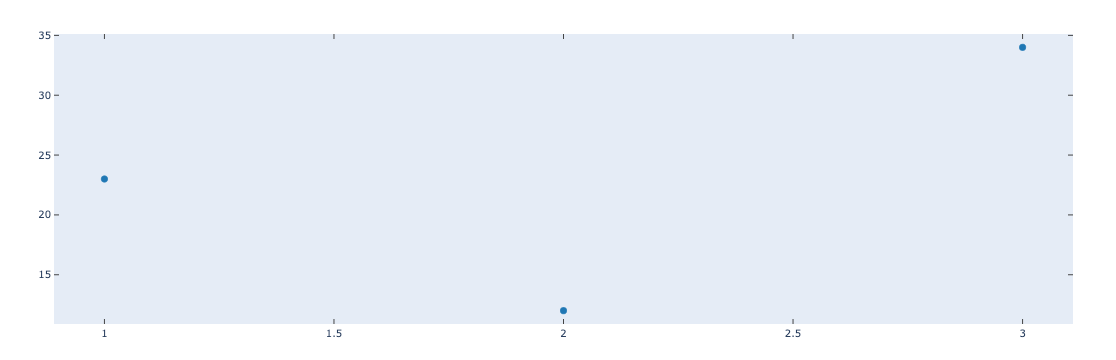

In [9]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from plotly.tools import mpl_to_plotly

mpl_fig, ax = plt.subplots()
ax.scatter(x=[1, 2, 3], y=[23, 12, 34])
plotly_fig = mpl_to_plotly(mpl_fig)
plotly_fig

